In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
train.shape

(381109, 12)

In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [8]:
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [9]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [10]:
train['Age'].value_counts()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

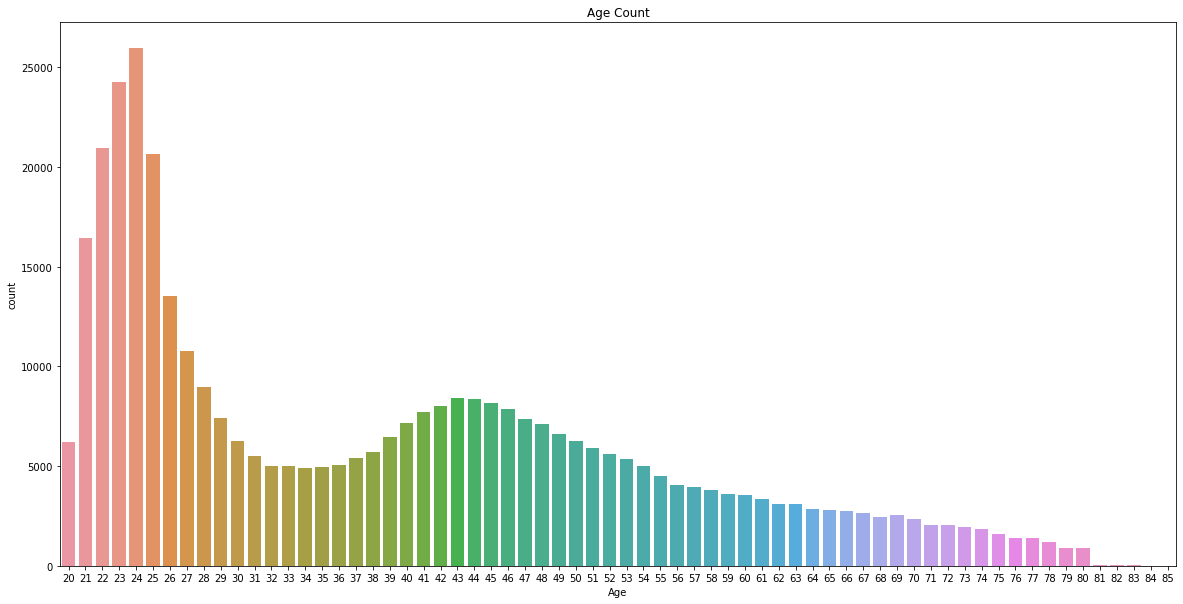

In [11]:
plt.figure(figsize=(20,10))
plt.title('Age Count')
sns.countplot(data=train, x ='Age');

<AxesSubplot:title={'center':'Gender Count color by Response'}, xlabel='Gender', ylabel='count'>

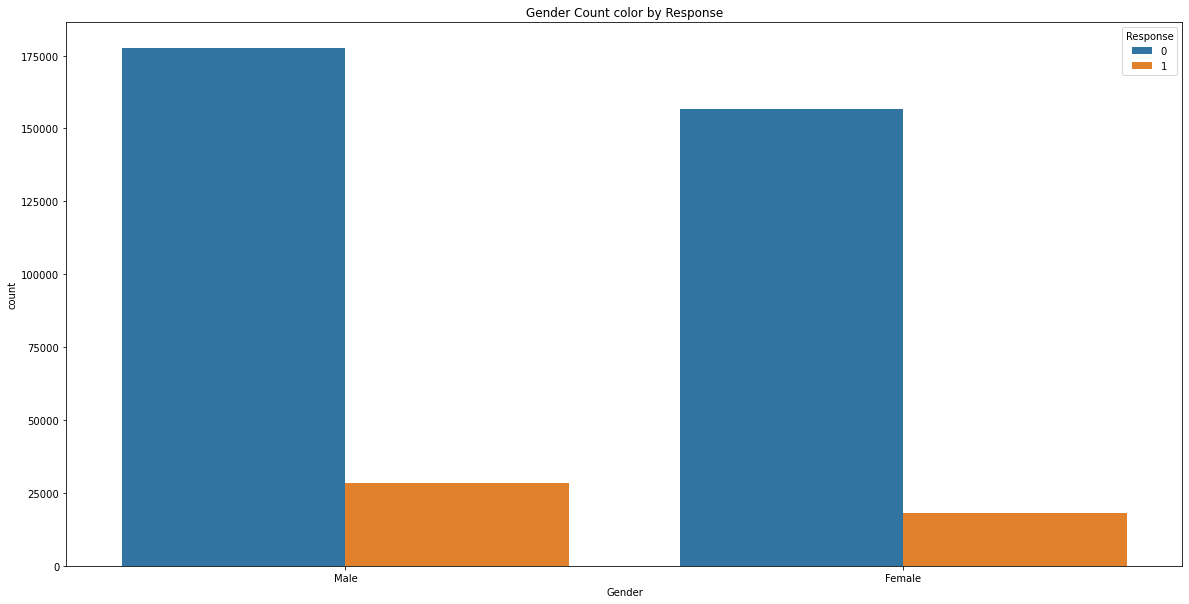

In [12]:
plt.figure(figsize=(20,10))
plt.title('Gender Count color by Response')
sns.countplot(data=train, x ='Gender', hue='Response')

<AxesSubplot:title={'center':'Boxplot of Annual Premium'}, xlabel='Annual_Premium'>

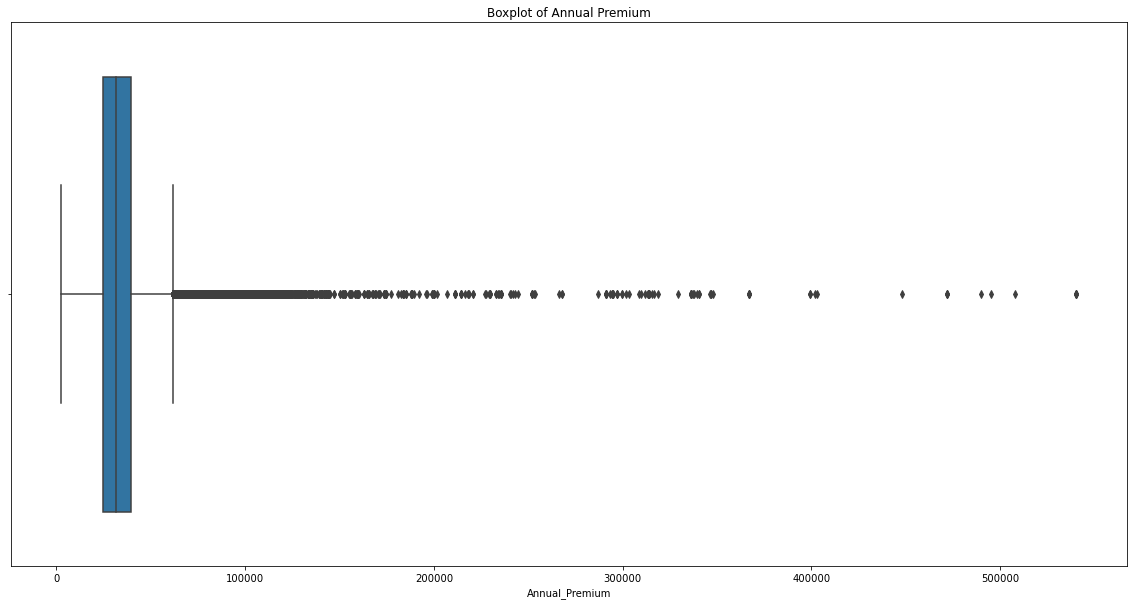

In [13]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Annual Premium')
sns.boxplot(data=train, x='Annual_Premium')

In [14]:
train[train['Region_Code']<0.1]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
181,182,Male,52,1,0.0,0,1-2 Year,Yes,2630.0,124.0,89,0
185,186,Male,52,1,0.0,1,1-2 Year,No,2630.0,26.0,134,0
232,233,Male,53,1,0.0,0,1-2 Year,Yes,2630.0,26.0,69,0
710,711,Female,46,1,0.0,0,1-2 Year,Yes,2630.0,47.0,292,0
1500,1501,Male,38,1,0.0,1,1-2 Year,No,2630.0,26.0,107,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380105,380106,Male,68,1,0.0,1,1-2 Year,No,2630.0,26.0,222,0
380195,380196,Male,55,1,0.0,0,1-2 Year,Yes,2630.0,13.0,156,0
380263,380264,Male,46,1,0.0,1,1-2 Year,No,2630.0,26.0,132,0
380307,380308,Female,59,1,0.0,0,1-2 Year,Yes,2630.0,26.0,105,0


In [15]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [16]:
# Data Preprocessing

In [17]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [18]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [19]:
train=pd.get_dummies(train,drop_first=True)

In [20]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [22]:
train=train.drop('id',axis=1)

In [23]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [24]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,0,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,0,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,0,1,1


In [25]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [27]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [28]:
# Modeling

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# visualization
import matplotlib.pyplot as plt

In [30]:
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
#test train split
from sklearn.model_selection import train_test_split
x = train.iloc[:,:-1].values[:100]
y = train.iloc[:,-1].values[:100]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
labels = LabelEncoder().fit_transform(y)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(labels))

binary
binary
binary


In [34]:
# Models of Dataset classification
models = []

def classification_Models(X_train,X_test, y_train, y_test ):
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('DTC',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('SVM',  SVC()) )
    modelresults = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modelresults.append(v_results)
        modelnames.append(name)
        
    print(modelresults)
classification_Models(X_train,X_test, y_train, y_test)

LR 0.8746438746438746
DTC 0.8504273504273504
KNN 0.6372269705603039
NB 0.6244064577397911
SVM 0.5365622032288698
[array([0.85185185, 0.92592593, 0.84615385]), array([0.77777778, 0.88888889, 0.88461538]), array([0.7037037 , 0.59259259, 0.61538462]), array([0.66666667, 0.62962963, 0.57692308]), array([0.62962963, 0.51851852, 0.46153846])]


In [35]:
for name,model in models:
    trainedmodel = model.fit(X_train,y_train)
    
    # prediction
    y_predict = trainedmodel.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_predict)
    classreport = classification_report(y_test,y_predict)
    confusnMatrix = confusion_matrix(y_test,y_predict)
    
    print('The accuracy: {}'.format(accuracy))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confusnMatrix))

The accuracy: 0.95
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

The Confusion Matrix:
 [[10  1]
 [ 0  9]]
The accuracy: 0.95
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

The Confusion Matrix:
 [[10  1]
 [ 0  9]]
The accuracy: 0.65
The Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1

D:\D\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Random forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [38]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [39]:
y_pred=model.predict(X_test)

In [40]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
# test data

In [61]:
from sklearn.model_selection import train_test_split
x = test.iloc[:,1:].values[:100]
y = test.iloc[:,1].values[:100]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
encoder = LabelEncoder().fit_transform(y)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(encoder))

binary
binary
binary


In [63]:
# Models of Dataset classification
models = []

def classification_Models(X_train,X_test, y_train, y_test ):
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('DTC',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('SVM',  SVC()) )
    modelresults = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modelresults.append(v_results)
        modelnames.append(name)
        
    print(modelresults)
classification_Models(X_train,X_test, y_train, y_test)

LR 1.0
DTC 1.0
KNN 0.6377018043684709
NB 1.0
SVM 0.587369420702754
[array([1., 1., 1.]), array([1., 1., 1.]), array([0.66666667, 0.59259259, 0.65384615]), array([1., 1., 1.]), array([0.59259259, 0.59259259, 0.57692308])]


In [64]:
for name,model in models:
    testmodel = model.fit(X_train,y_train)
    
    # prediction
    y_predict = testmodel.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_predict)
    classreport = classification_report(y_test,y_predict)
    confusnMatrix = confusion_matrix(y_test,y_predict)
    
    print('The accuracy: {}'.format(accuracy))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confusnMatrix))

The accuracy: 1.0
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

The Confusion Matrix:
 [[ 6  0]
 [ 0 14]]
The accuracy: 1.0
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

The Confusion Matrix:
 [[ 6  0]
 [ 0 14]]
The accuracy: 0.7
The Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1   

D:\D\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\D\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\D\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet

In [ ]:
# Rnadom Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [56]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [57]:
y_pred=model.predict(X_test)

In [58]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

